## Libraries

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd 
import random
from sklearn.model_selection import train_test_split
import copy, cv2,glob, shutil

import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
from keras import datasets, layers, models, optimizers
from keras import layers
from keras.models import Sequential
from keras.preprocessing.image import load_img, img_to_array
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping

from google.colab import files
import zipfile

## Mount to GDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Directory Arrangement

In [ ]:
directory = '/content/drive/MyDrive/facial_expression_recognition/images/images'
print(os.listdir(directory))

['train', 'validation']


In [ ]:
directory = '/content/drive/MyDrive/facial_expression_recognition/images/images/train'
print(os.listdir(directory))

['happy', 'disgust', 'fear', 'angry', 'sad', 'neutral', 'surprise']


In [ ]:
directory = '/content/drive/MyDrive/facial_expression_recognition/images/images/validation'
print(os.listdir(directory))

['disgust', 'angry', 'fear', 'surprise', 'neutral', 'sad', 'happy']


In [ ]:
base_dir = '/content/drive/MyDrive/facial_expression_recognition/images/images'
train_dir = '/content/drive/MyDrive/facial_expression_recognition/images/images/train'
val_dir = '/content/drive/MyDrive/facial_expression_recognition/images/images/validation'

#join basedir
train_dir = os.path.join(base_dir,'train') 
val_dir = os.path.join(base_dir,'validation')

# join train_dir
sad_dir = os.path.join(train_dir,'sad') 
disgust_dir = os.path.join(train_dir,'disgust')
happy_dir = os.path.join(train_dir,'happy')
neutral_dir = os.path.join(train_dir,'neutral')
angry_dir = os.path.join(train_dir,'angry')
surprise_dir = os.path.join(train_dir,'surprise')
fear_dir = os.path.join(train_dir,'fear')

# join val_dir
vsad_dir = os.path.join(val_dir,'sad') 
vdisgust_dir = os.path.join(val_dir,'disgust')
vhappy_dir = os.path.join(val_dir,'neutral')
vneutral_dir = os.path.join(val_dir,'neutral')
vangry_dir = os.path.join(val_dir,'angry')
vsurprise_dir = os.path.join(val_dir,'surprise')
vfear_dir = os.path.join(val_dir,'fear')


In [ ]:
print(os.listdir(base_dir))
print(os.listdir(train_dir))
print(os.listdir(val_dir))

['train', 'validation']
['happy', 'disgust', 'fear', 'angry', 'sad', 'neutral', 'surprise']
['disgust', 'angry', 'fear', 'surprise', 'neutral', 'sad', 'happy']


## Applying Data Augmentation Techniques

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.35,
    fill_mode = 'nearest',
)

test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.35,
    fill_mode = 'nearest'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48,48),
    batch_size= 128,
    color_mode = "grayscale",
    class_mode='categorical'
)

val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size = (48,48),
    batch_size = 128,
    color_mode = "grayscale",
    class_mode = 'categorical'
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
picture_size = 48
folder_path = train_dir

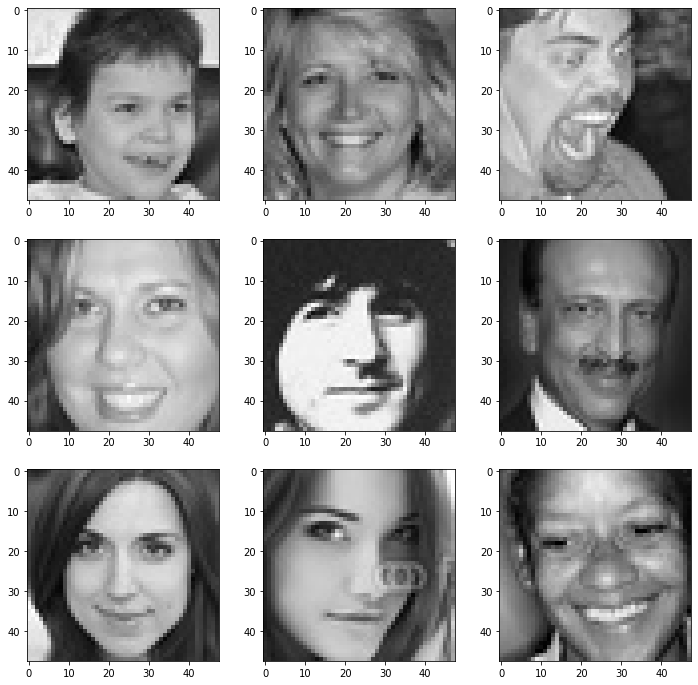

In [ ]:
expression = 'happy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"/"+expression+"/"+
                  os.listdir(folder_path +"/"+ expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

## Defining the CNN Model

In [ ]:
model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))


## Compiling the model with its optimizer, loss function and metric

In [ ]:
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_36 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation_36 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_44 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_49 (Conv2D)          (None, 24, 24, 128)     

## Defining the callbacks for the model 

In [ ]:
#callback
filepath= "model_final.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_weights_only=False)

early_stopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)

kol = [
        checkpoint,
        early_stopping,
#         learning_rate_reduction
    ]

## Fit Model

In [232]:
batch_size  = 128
#history = model.fit(
    #train_generator,
    #steps_per_epoch=train_generator.n//train_generator.batch_size, 
    #epochs = 3,
    #validation_data = val_generator,
    #validation_steps = val_generator.n//val_generator.batch_size, 
    #verbose=1,
    #callbacks=[kol]
#)

history = model.fit(train_generator,
                    steps_per_epoch=train_generator.n//train_generator.batch_size,
                    epochs=3,
                    validation_data = val_generator,
                    validation_steps = val_generator.n//val_generator.batch_size,
                    callbacks=kol)

Epoch 1/3
225/225 [==============================] - ETA: 0s - loss: 1.9369 - accuracy: 0.2323 
Epoch 1: val_accuracy improved from -inf to 0.25838, saving model to model_final.h5
225/225 [==============================] - 4158s 18s/step - loss: 1.9369 - accuracy: 0.2323 - val_loss: 1.8248 - val_accuracy: 0.2584
Epoch 2/3
225/225 [==============================] - ETA: 0s - loss: 1.7445 - accuracy: 0.3035
Epoch 2: val_accuracy improved from 0.25838 to 0.26946, saving model to model_final.h5
225/225 [==============================] - 1455s 6s/step - loss: 1.7445 - accuracy: 0.3035 - val_loss: 2.1246 - val_accuracy: 0.2695
Epoch 3/3
225/225 [==============================] - ETA: 0s - loss: 1.5775 - accuracy: 0.3849
Epoch 3: val_accuracy improved from 0.26946 to 0.32543, saving model to model_final.h5
225/225 [==============================] - 1445s 6s/step - loss: 1.5775 - accuracy: 0.3849 - val_loss: 1.8240 - val_accuracy: 0.3254


## Evaluation Model

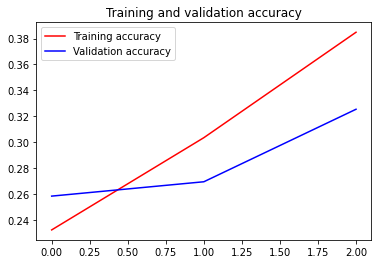

<Figure size 432x288 with 0 Axes>

In [234]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

## Classification Report of the model

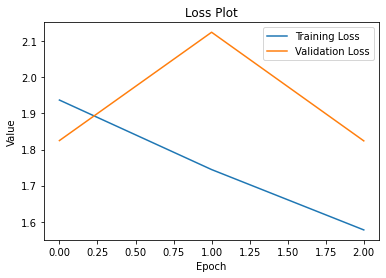

In [235]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

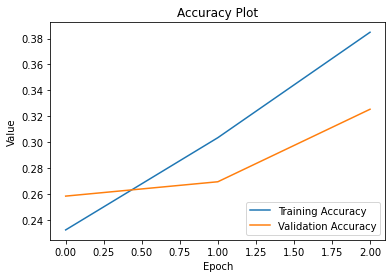

In [236]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

## Save Model

In [246]:
model.save('Modela.h5')